In [1]:
!which python

/Users/caihaocui/opt/miniconda3/bin/python


In [14]:
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from PIL import Image
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

# model_name = 'vgg11' # OK 
# model_name = 'squeezenet1_0'# OK
# model_name = 'resnet18' # OK
model_name = 'mobilenet_v2'# OK
# model_name = 'wide_resnet50_2'# OK
# model_name = 'inception_v3' # OK
# model_name = 'googlenet' # OK


model = torch.hub.load('pytorch/vision:v0.6.0', model_name, pretrained=True)
# or any of these variants

model.eval()

print(model)


filename = ("dog.jpg")
# sample execution (requires torchvision)
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
# create a mini-batch as expected by the model
input_batch = input_tensor.unsqueeze(0)

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to(device)
    model.to(device)

with torch.no_grad():
    output = model(input_batch)
    
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
# print(output[0])

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
# print(probabilities)


# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())


# writer = SummaryWriter("runs/"+model_name)
# writer.add_graph(model, input_batch)
# writer.close()

## Action: visualization
# tensorboard --logdir=runs


Using cache found in /Users/caihaocui/.cache/torch/hub/pytorch_vision_v0.6.0


MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [26]:
model_name = 'deeplabv3_resnet101'  
model = torch.hub.load('pytorch/vision:v0.6.0', model_name, pretrained=True)
# or any of these variants
model.eval()
print(model)


filename = ("dog.jpg")
# sample execution (requires torchvision)
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
# create a mini-batch as expected by the model
input_batch = input_tensor.unsqueeze(0)

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to(device)
    model.to(device)
    
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)
    

Using cache found in /Users/caihaocui/.cache/torch/hub/pytorch_vision_v0.6.0


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [27]:
output_predictions

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

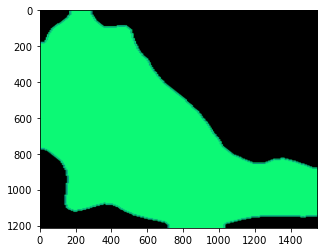

In [28]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)
